In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 6-1 퍼셉트론(Perceptron)

In [2]:
df_abalone = pd.read_csv('data/abalone.csv')
df_abalone.head()

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## 1.퍼셉트론(Perceptron)

생물학적 뉴런에서 영감을 받아 만들어진 퍼셉트론은 인공신경망(ANN)의 가장 기본적인 모델입니다. 

단순한 선형 분류 모델에 스텝 함수가 결합한 형태을 가지고 있습니다.

- 다른 신경 세포나 감각 기관의 입력 신호를 받아 세포체에서 합산이 되는 메카니즘은 퍼셉트론이 입력 신호를 가중치에 따라 합산을 내는 과정에 대응이 됩니다.

> $f(x) = \theta(w^Tx + b)$, 

- 임계값을 기준을 넘으면 1 그렇지 않으면 0을 내보내는 스텝 함수의 동작은 일정 수준 이상의 자극에 반응하는 신경 세포의 역치 반응과 유사합니다.

> $\theta(x) = \begin{cases} 1, & \text{if } x \geq 0 \\ 0, & \text{if } x < 0 \end{cases}$: 스텝 함수, 임계 논리 활성화 함수

- 선형의 분류 경계면을 생성합니다. 따라서 그 경계면 위에 있는 값들을 1, 밑에 있는 값들을 0으로 분류합니다.

> 비선형성 경계면이 필요한 분류 문제에는 적용이 어렵습니다.



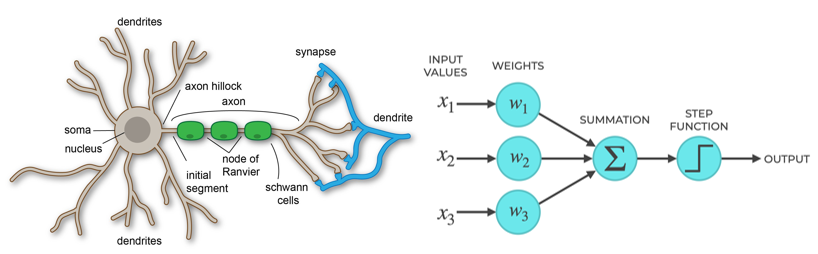

※ 이미지 출처: https://www.sharpsightlabs.com/blog/perceptrons-explained/

**sklearn.linear_model.Perceptron**

**주요 하이퍼파라메터**

|이름|설명|
|---|:-----|
|penalty|규제 종류: 'l1', 'l2'|
|alpha|규제 계수|


**[Ex.1]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

선형 함수로 분류가 가능한 2차원 분류 데이터셋 {X_lin, y_lin}과 
    
선형 함수로 분류가 가능하지 않은 2차원 분류 데이터셋 {X_nonlin, y_nonlin}을 두 개를 만듭니다. 

퍼셉트론을 사용하여 두 개의 데이터셋 분류 모델을 학습합니다. 두 개의 데이터셋에서 어떠한 분류면을 만들어 내는지 확인해봅니다.
    
</div>

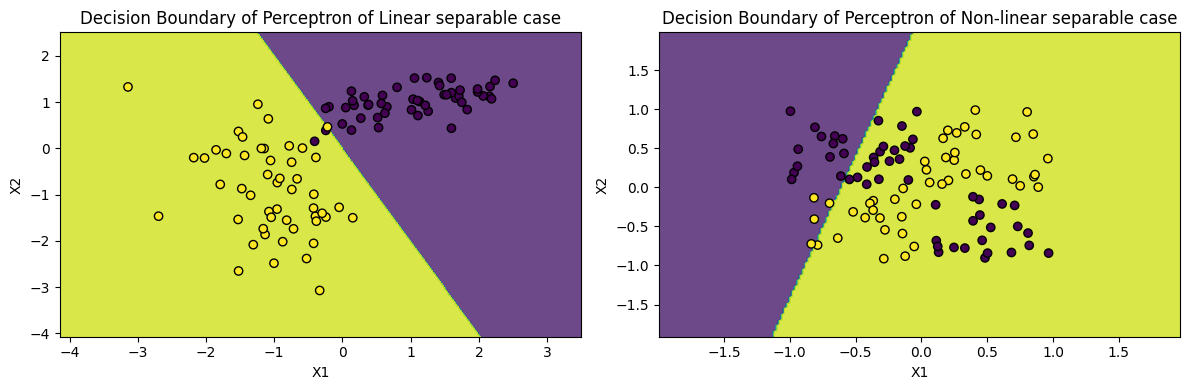

In [3]:
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

X_lin, y_lin = make_classification(
    n_samples=100, n_features=2, 
    n_informative=2, n_redundant = 0, n_repeated = 0,
    n_classes=2, n_clusters_per_class=1, random_state=123 
) # 두 개의 입력 변수를 지닌 선형 분류가 가능한 데이터셋을 만듭니다.

np.random.seed(123)
X_nonlin = np.random.rand(100, 2) * 2 - 1
y_nonlin = (X_nonlin[:, 0] * X_nonlin[:, 1] > 0).astype(int) # 바둑판 모양의 경계면을 지닌 선형 분류가 불가능한 데이터셋을 만듭니다.

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
for (X, y), ax, title in zip(
    [(X_lin, y_lin), (X_nonlin, y_nonlin)],
    axes.ravel(), ['Linear separable case', 'Non-linear separable case']
):
    # 단일 레이어 퍼셉트론 모델 정의 및 학습
    clf_per = Perceptron(random_state=123)
    clf_per.fit(X, y)

    # 분류 평면 시각화
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf_per.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolors='k')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_title('Decision Boundary of Perceptron of {}'.format(title))

plt.tight_layout()
plt.show()

### 규제(Regularization)

선형 회귀 모델과 마찬가지로 가중치(Weight)의 L1-norm과 L2-norm을 손실 함수에 더하여 Weight의 스케일이 커지는 것을 억제시킵니다.

**[Ex.2]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_abalone에서 성별(Sex)가 I이면 False, M 또는 F이면 True로 하는 변수 infant를 만듭니다.

df_abalone을 80%는 학습데이터 df_train, 20%는 평가데이터 df_test로 나눕니다.

입력 변수는 성별(Sex)과 infant를 제외한 모든 변수를 사용하고, 대상변수를 infant로 하는 퍼셉트론 모델을 규제 계수의 따른 성능 비교를 합니다.

l1 규제를 사용하고 비교할 규제 계수는 

```
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
```

입니다.

성능 측정은 AUC(Area Under the receiver characteristic Curve)로 합니다.
    
</div>

In [4]:
from sklearn.model_selection import train_test_split

df_abalone['infant'] = df_abalone['Sex'] == 'I'
df_train, df_test = train_test_split(df_abalone, train_size=0.8, random_state=123)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score

X_cols = [i for i in df_train.columns if i not in ['Sex', 'infant']]
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
var_list = list()
roc_train, roc_test = list(), list()

for alpha in alphas:
    roc_train_sub, roc_test_sub, var_sub = list(), list(), list()
    for _ in range(50):
        clf_per = make_pipeline(
            StandardScaler(), 
            Perceptron(penalty='l1', alpha=alpha)
        )

        clf_per.fit(df_train[X_cols], df_train['infant'])
        roc_train_sub.append(
            roc_auc_score(df_test['infant'], clf_per.decision_function(df_test[X_cols]))
        )
        y_hat = clf_per.decision_function(df_train[X_cols])
        var_sub.append(y_hat.var())
        roc_test_sub.append(roc_auc_score(df_train['infant'], y_hat))
    roc_train.append(np.mean(roc_train_sub))
    roc_test.append(np.mean(roc_test_sub))
    var_list.append(np.mean(var_sub))

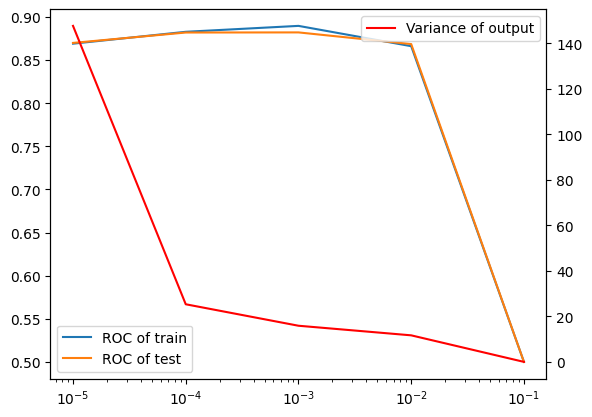

In [6]:
plt.xscale('log')
plt.plot(alphas, roc_train, label='ROC of train')
plt.plot(alphas, roc_test, label='ROC of test')
plt.legend()
tax = plt.gca().twinx()
tax.plot(alphas, var_list, label='Variance of output', color='red')
plt.legend()
plt.show()

## 2. 다층 퍼셉트론(Multilayer Perceptron)

여러 개의 퍼셉트론이 모여 층(Layer)을 이루고 층과 층의 함수적 연결 관계에 의한 네트워크 구조를 지니는 모델입니다.

### 층(Layer)

입력 데이터를 받아들이고 처리하는 작은 단위인 유닛(Unit)의 집합체입니다. 

- 입력 데이터를 받아 가중치에 따라 합산한 후, 다음 층으로 값을 전달하거나 최종 출력을 생성합니다.


### 다층 퍼셉트론(Multilayer Perceptron)

#### 구성 요소

1. 입력층(Input Layer): 외부에서 데이터를 받아들입니다.


2. 은닉층(Hidden Layer): 다수의 유닛(Unit)로 구성되어 있습니다. 입력과 출력층 사이에서 데이터 내재된 패턴들을 나타냅니다. 

> 유닛(Unit), 노드(Node): 입력을 처리하여 출력을 만드는 층을 구성하는 최소 단위

3. 출력층(Output Layer): 네트워크의 최종 출력을 생성합니다.


#### 순전파(Forward Propagation, Feed Forward)

- 데이터가 입력층에서 출력층의 방향으로 네트워크 형태로 정의된 층의 연결 구조에 따라 순차적으로 연산을 진행시키는 것입니다.



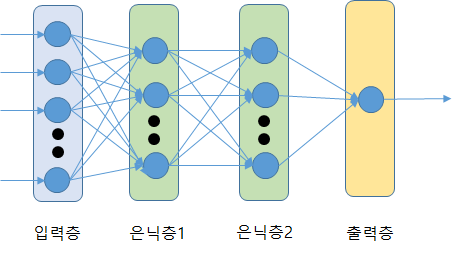

### 활성화 함수 

활성화 함수(Activation function): 연산형 유닛(Unit)이 출력하는 층의 입력의 가중합에 비선형성을 부여하는 함수입니다.

> 연산형 유닛의 기본 구성: $f(X) = \sigma(XW + b)$, $\sigma$: 활성화 함수, $X$: 유닛 입력 행렬, $w$: 유닛 가중치 벡터, $b$: 절편(bias)
>
> 입력과 출력사이의 선형 관계에서 비선형 관계로 바꾸어 층과 층의 연결을 통해 다양한 패턴을 나타낼 수 있게 합니다.
>
> 활성화 함수가 적용된 밀도층의 연산은 $f(X) = \sigma(XW + b)$ 가 됩니다.


**활성화 함수가 없다면?**

두 밀도층의 연산 $f_1(x)$와 $f_2(x)$를 아래와 같이 정의합니다.

> $f_1(X) = XW_1$, 
>
> $f_2(X) = XW_2$ 

두 밀도층의 연산 $f_1$ → $f_2$ 로 이루어진다면, 

> $f(x) = f_2(f_1(X)) = W_2 W_1 x = W x$ , $W = W_2 W_1$

결국 하나의 층이 표현하는 것과 같게 됩니다.


#### 좌우 수렴형

1. $\text{시그모이드(sigmoid)} = \frac{1}{1+e^{-x}}$


2. $\text{하이퍼볼릭 탄젠트(tanh)} = \frac{e^x - e^{-x}}{e^x + e^{-x}}$


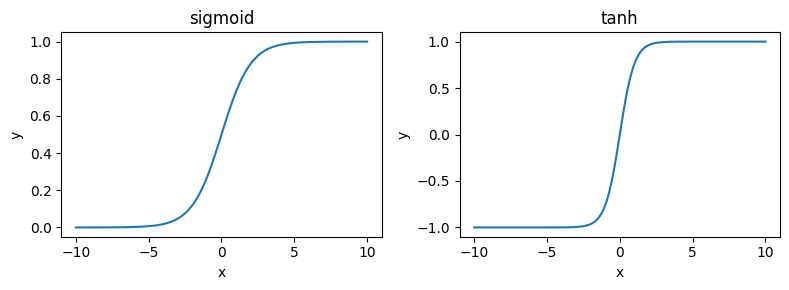

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

x = np.linspace(-10, 10,100)

for act, name, ax in zip(
    [lambda x: 1 / (1 + np.exp(-x)), lambda x: (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))],
    ['sigmoid', 'tanh'],
    axes.ravel()
):
    ax.plot(x, act(x))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(name)
plt.tight_layout()
plt.show()

**좌우 수렴형의 문제점**

**기울기 소실 문제(Vanishing Gradient)**: 네트워크의 깊이가 커질 수록 출력의 절대값이 커지는 성질이 있어, 절대값이 커질 수록 미분값이 작아지게 되어 기울기가 0이 되어 학습이 되지 않는 현상입니다.

#### 우측 발산형

기울기 소실 문제를 완화시켜주어, 네트워크의 깊이를 보다 깊게 구성하여 학습할 수 있게 합니다.

1. $\text{ReLU(Rectified Linear Unit)} = \begin{cases} x, &  x \geq 0 \\ 0, &  x < 0 \end{cases}, max(0, x)$

- Relu의 문제점: 어떤 입력에도 0을 출력하는 유닛이 발생합니다. 이 유닛들과 관련된 가중치의 미분값도 0이라 이 상태를 벗어날 수 없습니다.

2. $\text{Leaky ReLU(LeLU)} = \begin{cases} x, &  x \geq 0 \\ \alpha x, &  x < 0 \end{cases}, max(\alpha x, x)$, $\alpha < 1$

- ReLU가 상시 0을 출력하는 유닛을 생성하는 문제를 보완합니다.

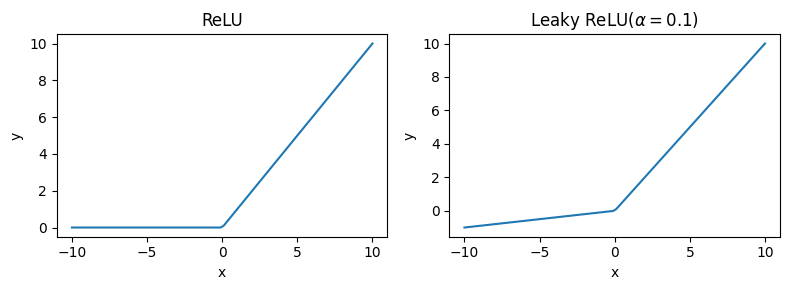

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

x = np.linspace(-10, 10,100)

for act, name, ax in zip(
    [lambda x: np.where(x > 0, x, 0), lambda x: np.where(x > 0, x, 0.1 * x)],
    ['ReLU', 'Leaky ReLU($\\alpha = 0.1$)'],
    axes.ravel()
):
    ax.plot(x, act(x))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(name)
plt.tight_layout()
plt.show()

**[Ex.3]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">
[Ex.1]에서 선형으로 나누지 못했던, {X_nonlin, y_nonlin} 데이터셋에서 다층 퍼셉트론 분류기를 만들과 결정 경계를 시각화합니다. 

이 때, 단층 퍼셉트론과, 다층 퍼셉트론에서 활성화 함수를 사용할 때와 하지 않을 때의 차이점을 비교해봅니다.
</div>

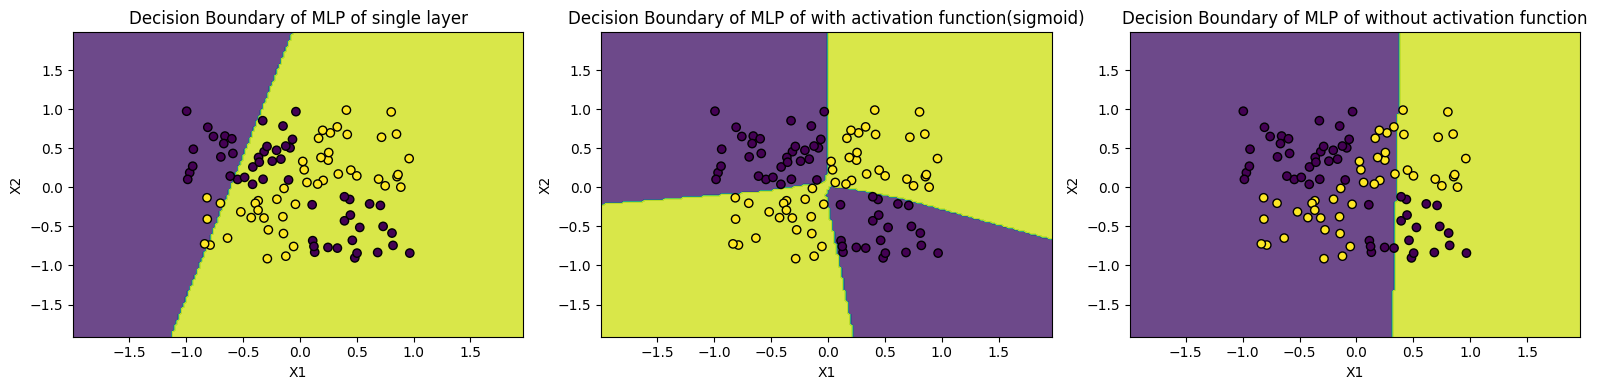

In [9]:
from sklearn.neural_network import MLPClassifier

fig, axes = plt.subplots(1, 3, figsize=(16, 4))
for activation, ax, title in zip(
    ['single', 'relu', 'identity'],
    axes.ravel(), ['single layer', 'with activation function(sigmoid)', 'without activation function']
):
    if activation == 'single':
        clf_mlp = Perceptron(random_state=123)
        clf_mlp.fit(X, y)
    else:
        # 다층 퍼셉트론 모델 정의 및 학습
        clf_mlp = MLPClassifier(
            hidden_layer_sizes=[4, 2], learning_rate_init=0.01, random_state=123, activation=activation, max_iter=1000
        )
    clf_mlp.fit(X_nonlin, y_nonlin)

    # 분류 평면 시각화
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf_mlp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)
    
    ax.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolors='k')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_title('Decision Boundary of MLP of {}'.format(title))

plt.tight_layout()
plt.show()

### 학습 알고리즘

경사하강법 + 오류 역전파

→ 오류 역전파를 통한 각 층에 있는 가중치와 손실 간의 경사도(Gradient)를 구하여 경사하강법을 통하여 가중치를 구합니다.

#### 가중치 초기화

- 절편은 보통 0으로 초기화합니다. 


- 가중치 초기화는 활성화 함수에 따라 학습 효율성이 높은 방법을 택합니다.

**좌우 수렴형**

Xavier(Glorot) 초기화를 사용합니다. 

> 균등 분포 [-r, r] $r = \sqrt{\frac{6}{n_{input} + n_{output}}}$
> 
> 정규 분포 $N(0, \sqrt{\frac{2}{n_{input} + n_{output}}})$

**우측 발산형**

He 초기화를 사용합니다.

> 균등 분포 [-r, r] $r = \sqrt{\frac{6}{n_{input}}}$
> 
> 정규 분포 $N(0,  \sqrt{\frac{2}{n_{input}}})$

#### 오류 역전파(Back Propagation)

손실과 각 층의 가중치와 경사를 미분의 연쇄 법칙(chain rule)을 이용하여 출력층에서 입력층으로 순전파(Feed forward)의 역의 방향으로 계산합니다.

손실함수 $Loss(y, \hat{y}) = \frac{1}{2  n}\sum_{i=1}^n(y_i - \hat{y_i})^2$

$\hat{y} = XW$ 이고, 

>$\mathbf{y} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}$,
$X = \begin{bmatrix} x_{11} & x_{12} & \ldots & x_{1p} \\ x_{21} & x_{22} & \ldots & x_{2p} \\ \vdots & \vdots & \ddots & \vdots \\ x_{n1} & x_{n2} & \ldots & x_{np} \end{bmatrix}$,
$\mathbf{W} = \begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_p \end{bmatrix}$

$X = X'W'$ 입니다.

> $X' = \begin{bmatrix} x'_{11} & x'_{12} & \ldots & x'_{1p'} \\ x'_{21} & x'_{22} & \ldots & x'_{2p'} \\ \vdots & \vdots & \ddots & \vdots \\ x'_{n1} & x'_{n2} & \ldots & x'_{np'} \end{bmatrix}$,
$\mathbf{W'} = \begin{bmatrix} w'_{11} & w'_{12} & \ldots & w'_{1p} \\ w_{21} & w_{22} & \ldots & w_{2p} \\ \vdots & \vdots & \ddots & \vdots \\ w_{p'1} & w_{p'2} & \ldots & w_{p'p} \end{bmatrix}$

데이터 포인트 별 잔차를

> $L = \begin{bmatrix} \frac{(y_1 - \hat{y_1})^2}{2 n} \\  \frac{(y_2 - \hat{y_2})^2}{2 n} \\ \vdots \\ \frac{(y_n - \hat{y_n})^2}{2 n} \end{bmatrix}$ 

데이터 포인트 별로 나누어 나타냅니다.

> $prop = \frac{dL}{d\hat{y}} = -\frac{1}{n} \begin{bmatrix} y_1 - \hat{y_1} \\  y_2 - \hat{y_2} \\ \vdots \\ y_n - \hat{y_n} \end{bmatrix}$ ... (1)

$prop$는 현재 층의 출력에서 오차를 줄이기 위한 **변이량**으로 정의합니다.

이를 기준으로 현재 층의 가중치의 경사도가 연쇄 법칙에 의해 구해집니다.

$ \frac{dL}{dW}$를 연쇄 법칙과 행렬의 곱을 이용 하여 나타내봅니다.

$\hat{y} = XW$ 에서 

> $\frac{d\hat{y}}{dW} = X = \begin{bmatrix} x_{11} & x_{12} & \ldots & x_{1p} \\ x_{21} & x_{22} & \ldots & x_{2p} \\ \vdots & \vdots & \ddots & \vdots \\ x_{n1} & x_{n2} & \ldots & x_{np} \end{bmatrix}$ 
>
> $ \frac{dLoss(y, \hat{y})}{dW} = -\frac{1}{n} \begin{bmatrix} \sum_{i=1}^n (y_1 - \hat{y_1}) x_{1i} \\ \sum_{i=1}^n (y_1 - \hat{y_1}) x_{2i} \\ \vdots \\ \sum_{i=1}^n (y_1 - \hat{y_1}) x_{pi} \end{bmatrix}$
> $ = -\frac{1}{n} \begin{bmatrix} x_{11} & x_{12} & \ldots & x_{1n} \\ x_{21} & x_{22} & \ldots & x_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ x_{p1} & x_{p2} & \ldots & x_{pn} \end{bmatrix}  \begin{bmatrix} y_1 - \hat{y_1} \\  y_2 - \hat{y_2} \\ \vdots \\ y_n - \hat{y_n} \end{bmatrix} = \left(\frac{d\hat{y}}{dW}\right)^T \frac{dL}{d\hat{y}}$


$ \frac{dLoss(y, \hat{y})}{dW} = X^T prop$ 

로 가중치와 손실간의 연산을 축약할 수 있습니다.

이전 층의 변이량이 연쇄 법칙에 의해 다음 층으로 변이량 전달됩니다. 이 과정을 풀어 봅니다.

$\hat{y} = XW$ 에서,

> $\frac{d\hat{y}}{dX} = W = \begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_p \end{bmatrix} $ ... (2)

(1)과 (2)를 이용하면 연쇄 법칙에 의해 prop'을 구할 수 있습니다.

> $prop' = -\frac{1}{n} \begin{bmatrix} (y_1 - \hat{y_1})w_1 & (y_1 - \hat{y_1})w_2 & \ldots & (y_1 - \hat{y_1})w_p \\ (y_2 - \hat{y_2})w_1 & (y_2 - \hat{y_2})w_2 & \ldots & (y_2 - \hat{y_2})w_p \\ \vdots & \vdots & \ddots & \vdots \\ (y_n - \hat{y_n})w_1 & (y_n - \hat{y_n})w_2 & \ldots & (y_n - \hat{y_n})w_p \end{bmatrix}$
> $= -\frac{1}{n} \begin{bmatrix} y_1 - \hat{y_1} \\  y_2 - \hat{y_2} \\ \vdots \\ y_n - \hat{y_n} \end{bmatrix} \begin{bmatrix} w_1 & w_2 & \ldots & w_p \end{bmatrix}$
> $ = \frac{dL}{d\hat{y}}(\frac{d\hat{y}}{dX})^T$

$prop' = prop W^T$ ... (3)

으로 축약할 수 있습니다.

다음 층의 변이량 $prop'$은 이전 층의 변이량에서 $prop$로 계산합니다.

$X = X'W'$ 에서

> $ \frac{dX}{dW'} = X'$ 
>
> $ \frac{dLoss(y, \hat{y})}{dW'} = (X')^T prop'$

이전 층의 변이량은 $prop$ 에서 $prop'$를 (3)과 동일한 방법으로 전파됩니다.

**[Ex. 4]**

다층 퍼셉트론의 구조가 아래 그림과 같습니다.

손실 함수는 아래와 같습니다.

$L(y, \hat{y}) = \frac{1}{2}\left(y - \hat{y}\right)^2$

오류 역전파를 통해 $\frac{dL(y, \hat{y})}{W_1}, ... \frac{dL(y, \hat{y})}{W_3}$, $\frac{dL(y, \hat{y})}{b_1}, ... , \frac{dL(y, \hat{y})}{b_3}$ 를 유도해 봅니다.

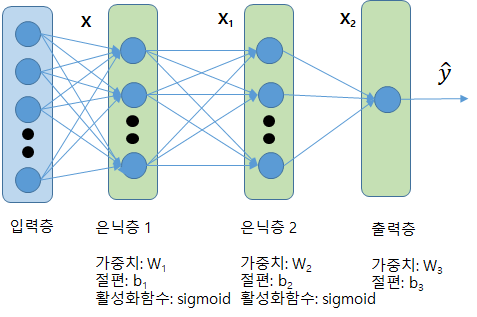

1. 밀도층의 계산 과정은 아래와 같이 나누어 보고, 연쇄 법칙을 위한 미분을 해봅니다.


2. 활성화 함수를 역전파 과정에 반영하기 위하여 sigmoid 의 미분을 해봅니다.

<div style="border: 0px solid #ddd; padding: 12px; margin-top: 10px; margin-left: 20px">

$\circ$: 요소곱(element-wise product) 행렬의 동일 위치의 요소 간의 곱입니다.

> $X' = sigmoid(S) = \frac{1}{1 + e^{-S}}, S = XW + b$

> $\frac{d{X'}}{d{S}} = \frac{e^{-S}}{(1 + e^{-S})^2} = \frac{1 + e^{-S}}{(1 + e^{-S})^2} - \frac{1}{(1 + e^{-S})^2} = X'\circ(\mathbf{1} - X')$

</div>

2. $\hat{y} = X_2W_3 + b_3$

<div style="border: 0px solid #ddd; padding: 12px; margin-top: 10px; margin-left: 20px">

$prop_3 = \frac{dL}{\hat{y}} = - \frac{(y - \hat{y})}{n}$ 

$ \frac{dL(y, \hat{y})}{dW_3} = X_2^T prop_3$, $ \frac{dL(y, \hat{y})}{db_3} = prop_3 \mathbf{1}$

$ \frac{dL}{dX_2} = prop_3 W_3^T $
    
</div>

3. $X_2 = sigmoid(X_1W_2 + b_2)$

<div style="border: 0px solid #ddd; padding: 12px; margin-top: 10px; margin-left: 20px">

$\frac{d{X_2}}{d{S_2}} = sigmoid(S_2) = X_2 \circ (\mathbf{1} - X_2)$

$prop_2 = \frac{dL}{dS_2} = \frac{dL}{dX_2} \frac{d{X_2}}{d{S_2}} = prop_3 W_3^T \circ X_2 \circ (\mathbf{1} - X_2)$

$\frac{dL(y, \hat{y})}{dW_2} = X_1^T prop_2$, $ \frac{dL(y, \hat{y})}{db_2} = prop_2\mathbf{1}$, $ \frac{dL}{dX_1} = prop_2 W_2^T$
    
</div>

4. $X_1 = sigmoid(XW_1 + b_1)$

<div style="border: 0px solid #ddd; padding: 12px; margin-top: 10px; margin-left: 20px">

$prop_1 = \frac{dL}{dS_1} = prop_2 W_2^T \circ X_1 \circ (\mathbf{1} - X_1)$

$\frac{dL(y, \hat{y})}{dW_1} = X^T prop_1$, $ \frac{dL(y, \hat{y})}{db_1} = prop_1\mathbf{1}$, $ \frac{dL}{dX} = prop_1 W_1^T$
    
</div>

**[Ex.5]**

퍼셉트론에도 연결 함수(Link function)을 써서 분류 모델로 만들 수 있습니다. 분류 모델의 오류 역전파 과정을 정리해봅니다. 

출력 레이어의 

출력에 로지스틱 회귀와 같이 로지스틱 함수를 연결 함수로 만듭니다.

> $logit = X_2 W_3 + b_3$
>
> $\hat{y} = \frac{1}{1 + e^{-logit}}$

이진 크로스 엔트로피(Binary cross entorpy)를 손실 함수로 사용하면,

> $Loss(y, \hat{y}) = - \frac{1}{n}\sum_{i=1}^n \left(y_i log \hat{y_i} - (1 - y_i)log(1 - \hat{y_i}) \right)$
>
> $\frac{dL}{d\hat{y}} = \frac{1}{n}\frac{\hat{y} - y}{\hat{y}(1 - \hat{y})}$
>
> $\frac{d\hat{y}}{d logit} = \hat{y}(1 - \hat{y})$

아래와 같이 층에 의한 오차를 계산할 수 있습니다.

> $prop = \frac{dL}{d logit} = \frac{\hat{y} - y}{n}$

이 과정을 반영하여 오류 역전파를 직접 구현해보고, {X_nonlin, y_nonlin} 셋에 적용해봅니다.

In [10]:
from scipy.special import expit # sigmoid 함수

def forward_prop(X, weights, bias):
    """
    순전파를 합니다.
    Parameters:
        X: np.ndarray
            입력 행렬
        weights: list
            층별 가중치
        bias: list
            층별 절편
    Returns:
        np.ndarray, list
            출력값, 층별 입력 행렬
    """
    # sigmoid 함수의 미분을 구하기 위해 각 스텝의 입력을 저장합니다.
    X_step = [X]
    for w, b in zip(weights[:-1], bias[:-1]):
        X = expit(np.dot(X, w) + b)
        X_step.append(X) # 층의 출력을 X_step에 저정합니다.
    y_hat = expit(np.dot(X, weights[-1]) + bias[-1]) # 마지막 층입니다.
    return y_hat, X_step

def back_prop(weights, bias, y, y_hat, X_step):
    """
    역전파를 합니다.
    Parameters:
        weights: list
            층별 가중치
        bias: list
            층별 절편
        y: np.ndarray
            대상 변수
        y_hat: np.ndaarray
            예측 확률(Positive)
        X_step: list
            층별 입력
    """
    n = y.shape[0]
    # 출력층의 경사를 계산합니다.
    prop = (y_hat - y) / n
    dW = np.dot(X_step[-1].T, prop)
    db = np.sum(prop, axis=0)
    # 이전 층으로 전파할 변이량을 계산 합니다.
    prop = np.dot(prop, weights[-1].T)
    dWs, dbs = [dW], [db] # 각 층의 가중치와 절편의 경사를 저장합니다.
    for w, X_s, X_s2 in zip(weights[-2::-1], X_step[::-1], X_step[-2::-1]):
        # 변이량에 활성화 함수(sigmoid)의 미분을 곱합니다.
        prop = prop * (X_s * (1 - X_s))
        dW = np.dot(X_s2.T, prop)
        db = np.sum(prop, axis=0)
        dWs.append(dW)
        dbs.append(db)
        # 이전 층으로 전파할 변이량을 계산 합니다.
        prop = np.dot(prop, w.T)
    # 방향을 반대로하여, 입력층에서 출력층 방향으로 나열 시킵니다.
    dWs.reverse()
    dbs.reverse()
    return dWs, dbs 

def update_params(weights, bias, d_weights, d_bias, rate):
    # 가중치(절편 포함)들을 계산된 경사도로 업데이트 합니다.
    for w, b, dw, db in zip(weights, bias, d_weights, d_bias):
        w -= rate * dw
        b -= rate * db 

In [11]:
from sklearn.metrics import log_loss, accuracy_score
X = X_nonlin
y = np.expand_dims(y_nonlin, axis=-1)
units = [4, 2]
size = [X.shape[1]] + units + [1]
np.random.seed(12)

# He Uniform 방식으로 가중치를 초기화합니다.
weights = [np.random.uniform(-(6 / (i + o)) ** 0.5, (6 / (i + o)) ** 0.5, size=(i, o)) 
           for i, o in zip(size[:-1], size[1:])]
bias = [np.zeros(i) for i in size[1:]]

learning_rate = 1 # 학습율 입니다.

# 손실과 성능을 기록합니다.
loss_hist, accuracy_hist = list(), list()
for i in range(3000):
    y_hat, X_step = forward_prop(X, weights, bias)
    d_weights, d_bias = back_prop(weights, bias, y, y_hat, X_step)
    update_params(weights, bias, d_weights, d_bias, learning_rate)
    loss_hist.append(log_loss(y, y_hat))
    accuracy_hist.append(accuracy_score(y, y_hat > 0.5))

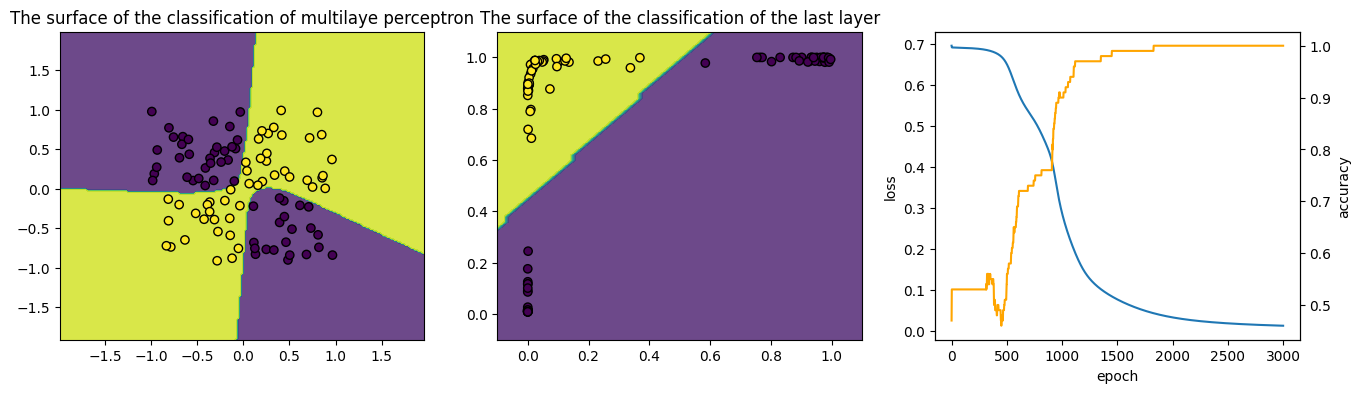

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(16 , 4))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z, _ =  forward_prop(np.c_[xx.ravel(), yy.ravel()], weights, bias)
Z = Z.reshape(xx.shape)
Z = Z > 0.5

axes[0].contourf(xx, yy, Z, alpha=0.8)
axes[0].scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolors='k')
axes[0].set_title('The surface of the classification of multilaye perceptron')

xx, yy = np.meshgrid(np.arange(-0.1, 1.1, 0.02), np.arange(-0.1, 1.1, 0.02))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], weights[-1]) + bias[-1]
Z = Z.reshape(xx.shape)
Z = Z > 0
axes[1].contourf(xx, yy, Z, alpha=0.8)
axes[1].scatter(X_step[-1][:, 0], X_step[-1][:, 1], c=y, marker='o', edgecolors='k')
axes[1].set_title('The surface of the classification of the last layer')

axes[2].plot(loss_hist)
tax = axes[2].twinx()
tax.plot(accuracy_hist, color='orange')
axes[2].set_xlabel('epoch')
axes[2].set_ylabel('loss')
tax.set_ylabel('accuracy')
plt.show()